# SK-Learn Decision Tree

In [ ]:
"""
- TODO:
  1. Ubah dataset ke dalam dataframe.
  2. Hapus kolom 'Id' pada dataframe serta pisahkan antara atribut dan label. 
  3. Bagi dataset menjadi data latih dan data uji.
  4. Buat dan latih model Decision Tree.
  5. Lakukan pengujian model dengan menggunakan data uji. 
  6. Lakukan prediksi dengan model yang telah dilatih.
  7. Visualisasi model Decision Tree yang telah dilatih.
"""

### 1. Ubah dataset ke dalam dataframe.

In [2]:
import pandas as pd

iris = pd.read_csv("/content/sample_data/Iris.csv")

In [3]:
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Hapus kolom 'Id' pada dataframe serta pisahkan antara atribut dan label.

In [4]:
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Bagi dataset menjadi data latih dan data uji.

In [5]:
# Memisahkan atribut dan label
X = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = iris["Species"]

# Membagi dataset menjadi data latih dan uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

### 4. Buat dan latih model Decision Tree.

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model menggunakan data train
tree_model = tree_model.fit(X_train, y_train)

### 5. Lakukan pengujian model dengan menggunakan data uji.

In [7]:
# Evaluasi model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)
acc_score = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_score)

Accuracy:  0.933


### 6. Lakukan prediksi dengan model yang telah dilatih.

In [8]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


### 7. Visualisasi model Decision Tree yang telah dilatih.

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file="iris_tree.dot",
    feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded=True,
    filled=True
)

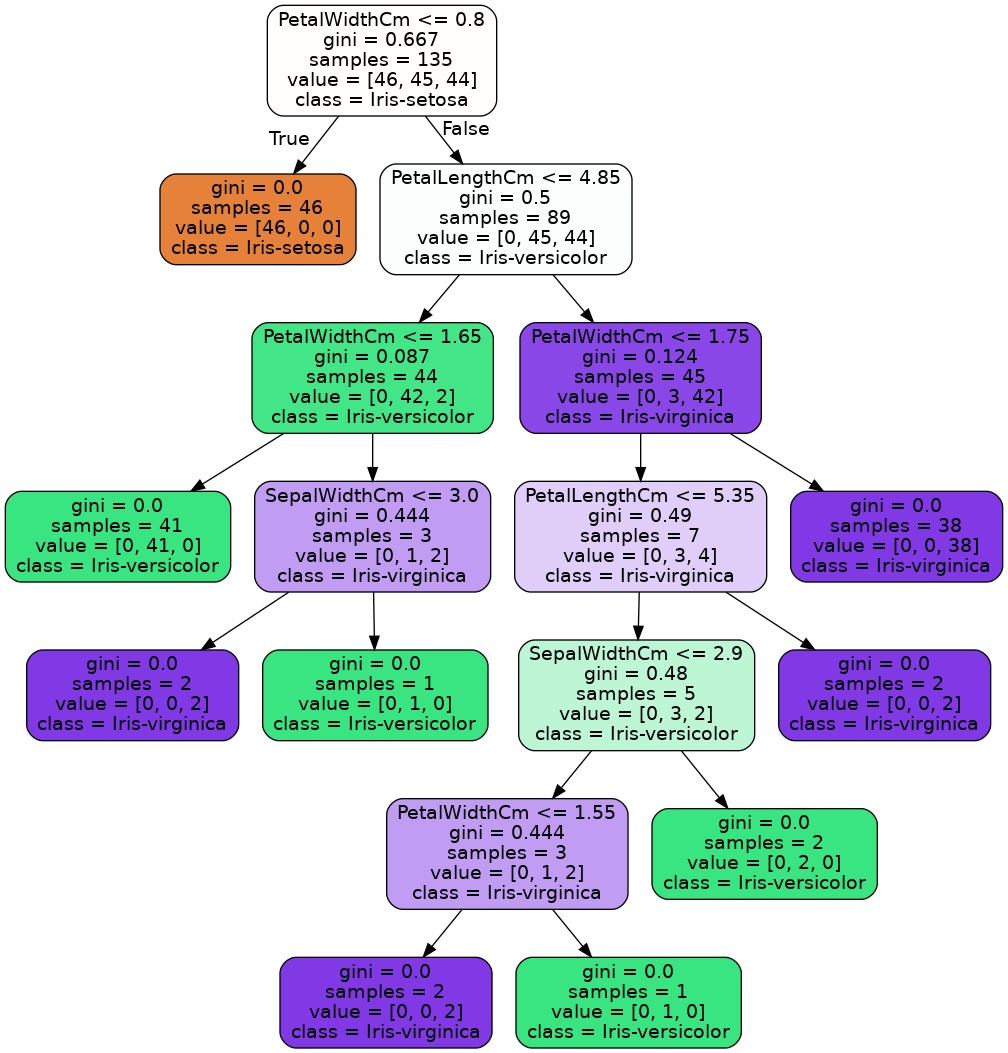